In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn import datasets, decomposition
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
df_train = pd.read_csv('441D1train.csv')
df_train.head()

,Id,Income,Age,Experience,Married,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Default
0,0,4.534463e+06,44.0,12.0,0.0,1.0,0.0,3.0,10.0,1.0
1,1,7.848906e+06,49.0,14.0,0.0,0.0,1.0,7.0,11.0,0.0
2,2,4.969695e+06,53.0,6.0,0.0,0.0,0.0,3.0,12.0,1.0
3,3,5.656258e+06,65.0,10.0,0.0,0.0,0.0,7.0,7.0,0.0
4,4,2.842247e+06,62.0,12.0,0.0,0.0,0.0,2.0,7.0,0.0


In [4]:
train_components = df_train.iloc[:,1:-1].to_numpy()
train_labels = df_train.Default.to_numpy()

In [5]:
pca = decomposition.PCA(n_components=2)
pca.fit(train_components)
new_components = pca.transform(train_components)

Check if data is roughly linarly seperable. Will simple algorithms work? Or do I need a nerual network?

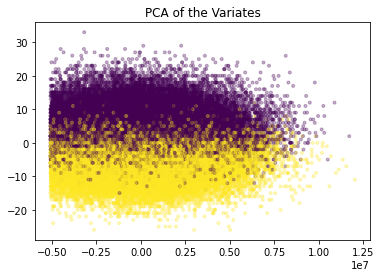

In [6]:
plt.scatter(
    x= new_components[:,0], 
    y=new_components[:,1], 
    c=train_labels,
    cmap='viridis',
    alpha=0.3, marker='.',
)
plt.title('PCA of the Variates')
plt.show()

It looks roughly seperable, even on only 2 principle componennts. Let's proceed with a simple algorithm, LDA

In [7]:
lda = QuadraticDiscriminantAnalysis(solver='eigen')
lda.fit(train_components, train_labels)
lda.score(train_components, train_labels)

0.989625

In [8]:
train_scores, val_scores = sklearn.model_selection.validation_curve(
    lda, train_components, train_labels,
    param_name='shrinkage', param_range=np.logspace(-20, -6, num=11)
)

In [13]:
pd.DataFrame({
    'Regularization':np.logspace(-20, -6, num=11),
    'Mean_Train_Score':train_scores.mean(axis=1),
    'Mean_Val_Score':val_scores.mean(axis=1)
})

,Regularization,Mean_Train_Score,Mean_Val_Score
0,1.000000e-20,0.989803,0.989513
1,2.511886e-19,0.989803,0.989513
2,6.309573e-18,0.989803,0.989513
3,1.584893e-16,0.989800,0.989575
4,3.981072e-15,0.989812,0.989663
5,1.000000e-13,0.982987,0.983000
6,2.511886e-12,0.944922,0.944862
7,6.309573e-11,0.868997,0.869125
8,1.584893e-09,0.840913,0.840662
9,3.981072e-08,0.571469,0.572113


Looks like a 0 regularization has the best performance and has no issues with overfitting.

Lets predict now.

In [10]:
df_test = pd.read_csv('441D1test.csv')
test_X = df_test.iloc[:,1:].to_numpy()
test_predictions = lda.predict(test_X)

In [11]:
df_predictions = df_test.Id.to_frame().copy()
df_predictions['Default'] = test_predictions
df_predictions.head()

,Id,Default
0,0,1.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,1.0


In [12]:
df_predictions.to_csv('predictions_lda_01.csv', index=False)